### 1 IntroPyTorch

> PyTorch is a deep learning framework and a scientific computing package.

这里说的科学计算是指它对于`Tensor`的计算支持，`Tensor`是一个多维的数组。

> A tensor is an n-dimensional array

PyTorch支持GPU加速。

> PyTorch tensor operations can be performed on a GPU

Tensor（张量）对于 deep learning 以及 neural networks 都十分重要，是基础的数据结构。

#### A list of PyTorch packages and corresponding descriptions

| Package               | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| `torch`               | Top-level PyTorch package and tensor library                 |
| `torch.nn`            | 主要包含用于构建神经网络的modules，extensible classes        |
| `torch.autograd`      | Supports all the differentiable Tensor operations in PyTorch（计算梯度） |
| `torch.nn.functional` | Contains typical operations like loss functions，activation functions，convolution operations |
| `torch.optim`         | Contains standard optimization operations like SGD and Adam  |
| `torh.utils`          | Contains utility classes like data sets and data loaders that preprocessing data |
| `torchvision`         | Provides access to popular datasets，model architectures and image transformations for CV |

PyTorch use ***Computational Graphs（计算图）*** to calculate derivatives，更具体的说，是***dynamic computational graph（动态图）***

### 2 Why Deep Learning use GPUS?

> A GPU is a processor that is good at handing specialized computations（computaions can be done in parallel）
>
> CPU就好比1位高中生，5分钟就能做出一道几何题，但是要让他5分钟做1000道简单的加法题，可能会做不完。而GPU就好比100位小学生，虽然会的东西不及高中生，但是让它们在5分钟内合力完成1000道简单的加法题，还是绰绰有余的。

并行计算（Parallel computing）是一种特殊的计算类型，它可以被分解为多个更小的、互相独立的计算，可以被同时计算，计算的结果最后重新组合得到最终的结果。更大的任务能被分解为小任务的数量取决于硬件包含的核心数，核心是给定的处理器真正执行计算的地方，CPU一般有4，8，16核，而GPU可能有上千核心

#### Neural Networks Are Embarrassingly Parallel

因为神经网络的运算是矩阵运算，而矩阵运算可以分解为互不影响的独立运算，比如卷积操作。

#### Nvidia Hardware（GPU）and Software（CUDA）

> An Nvidia GPU is the hardware that enables parallel computations, while CUDA is a software layer that provides an API for developers

当我们使用Nvidia GPU时，我们必须使用CUDA。开发者可以通过CUDA toolkit来使用GPU，toolkit有一些专门的库，如cuDNN（CUDA Deep Neural Network library）。使用PyTorch时，我们只需要有一块支持的Nvidia GPU，而不必知道怎么用CUDA，但如果是PyTorch的核心开发团队或写扩展程序，我们就需要知道怎么用CUDA，PyTorch：Python C++ CUDA

GPU是底下的硬件，CUDA是在他之上的软件，而cuDNN这样的库在CUDA之上

在PyTorch中使用CUDA非常简单：

In [1]:
import torch

t = torch.tensor([1,2,3])
print(t)
t = t.cuda()
print(t)

tensor([1, 2, 3])
tensor([1, 2, 3], device='cuda:0')


### 3 What is a Tensor ?

> A tensor is the primary data structure used by neural networks

- number, array, 2d-array 一般用在computer science

- scalar, vector, matrix 一般用在mathematics

In deep learning, we usually just refer to all of these as tensors.

| Indexes required | Computer science | Mathematics |
| ---------------- | ---------------- | ----------- |
| 0                | number           | scalar      |
| 1                | array            | vector      |
| 2                | 2d-array         | matrix      |

In [2]:
a = [1,2,3,4]
a[2]

3

In [3]:
dd = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
dd[0][2]

3

当访问一个结构中的元素需要有超过两个的索引时，我们会选择更一般的表示方法来表示这个结构，在数学上，就会使用 ***tensor*** 或 ***nd-tensor***，n 告诉我们在这个结构中需要多少索引来访问一个具体的元素。在CS中，使用 ***多维数组*** 或是 ***nd-array*** 。

> Tensors and nd-arrays are the same thing

- A scalar is a 0 dimentional tensor

- A vector is a 1 dimentional tensor

- A matrix is a 2 dimentional tensor
- A nd-array is an n dimentional tensor

### 4 Rank Axes Shape

#### Rank of a tensor

The *rank* of a tensor refers to the number of dimensions present within the tensor.

> A tensor's rank tells us how many indexes are needed to refer to a specific element within the tensor.

#### Axes of a tensor

> An axis of a tensor is a specific dimension of a tensor.

The length of each axis tells us how many indexes are available along each axis.

#### Shape of a tensor

> The shape of a tensor gives us the length of each axis of the tensor.

In [4]:
t = torch.tensor(dd)
t.shape

torch.Size([3, 3])

### 5 CNN Tensor Shape Explained

> [Batch, Channels, Height, Width] or NCHW

PyTorch uses NCHW，others framework use NHWC

### 6 Introducing PyTorch Tensors
PyTorch tensors are instances of the `torch.Tensor` class

We can create a `torch.Tensor` object using the class constructor like:

In [5]:
t = torch.Tensor()
type(t)

torch.Tensor

#### Tensor Attributes
- `torch.dtype`

- `torch.device`

- `torch.layout`

In [6]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


| Data type                | dtype         | CPU tensor         | GPU tensor              |
| ------------------------ | ------------- | ------------------ | ----------------------- |
| 32-bit floating point    | torch.float32 | torch.FloatTensor  | torch.cuda.FloatTensor  |
| 64-bit floating point    | torch.float64 | torch.DoubleTensor | torch.cuda.DoubleTensor |
| 16-bit floating point    | torch.float16 | torch.HalfTensor   | torch.cuda.HalfTensor   |
| 8-bit integer (unsigned) | torch.uint8   | torch.ByteTensor   | torch.cuda.ByteTensor   |
| 8-bit integer (signed)   | torch.int8    | torch.CharTensor   | torch.cuda.CharTensor   |
| 16-bit integer (signed)  | torch.int16   | torch.ShortTensor  | torch.cuda.ShortTensor  |
| 32-bit integer (signed)  | torch.int32   | torch.IntTensor    | torch.cuda.IntTensor    |
| 64-bit integer (signed)  | torch.int64   | torch.LongTensor   | torch.cuda.LongTensor   |

In [7]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

#### Creating Tensors Using Data

- `torch.Tensor(data)`
- `torch.tensor(data)`
- `torch.as_tensor(data)`
- `torch.from_numpy(data)`

#### Creation Options Without Data

In [8]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [9]:
torch.zeros([3])

tensor([0., 0., 0.])

In [10]:
torch.ones([3])

tensor([1., 1., 1.])

In [11]:
torch.rand([3])

tensor([0.2182, 0.7553, 0.9791])

在创建Tensor时首选`torch.tensor()`以及`torch.as_tensor()`(共享原变量的内存)

### 7 Reshaping Tensor

#### Tensor shape review

In [12]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
])
t

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

有两种方法得到它的`shape`

In [13]:
t.size()

torch.Size([3, 4])

In [14]:
t.shape

torch.Size([3, 4])

在PyTorch中，`size`和`shape`是一个意思

我们可以从`shape`推断出它的`rank`

In [15]:
len(t.shape)

2

也可以计算元素的个数

In [16]:
torch.tensor(t.shape).prod()

tensor(12)

在PyTorch，有一个专用的函数

In [17]:
t.numel()

12

The number of elements contained within a tensor is important for reshaping because the reshaping must account for the total number of elements present, `reshape` only changes the tensor's shape.

In [18]:
t

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [19]:
t.reshape([1,12])

tensor([[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]])

In [20]:
t.reshape([4,3])

tensor([[1, 1, 1],
        [1, 2, 2],
        [2, 2, 3],
        [3, 3, 3]])

In [21]:
t.reshape([2,6])

tensor([[1, 1, 1, 1, 2, 2],
        [2, 2, 3, 3, 3, 3]])

In [22]:
t.reshape([2,2,3])

tensor([[[1, 1, 1],
         [1, 2, 2]],

        [[2, 2, 3],
         [3, 3, 3]]])

另一种常用的改变`shape`的方式是`squeezing`和`unsqueezing`

In [23]:
print(t.reshape([1,12]).shape)
print(t.reshape([1,12]).squeeze().shape)

torch.Size([1, 12])
torch.Size([12])


In [24]:
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0).shape)

torch.Size([1, 12])


Flatten A Tensor

> Flattening a tensor means to remove all of the dimensions except for one.

#### Concatenating Tensors

We combine tensors using the `cat()` function

In [25]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])

t2 = torch.tensor([
    [5,6],
    [7,8]
])

In [26]:
torch.cat((t1,t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [27]:
torch.cat((t1,t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

### Flattening An Entire Tensor

A tensor flatten operation is a common operation inside convolutional neural networks, this is because convolutional layer outputs that are passed to fully connected layers must be flatted before the fully connected layer will accept the input.

In [28]:
t1 = torch.full([4,4], 1)
t1

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [29]:
t2 = torch.full([4,4], 2)
t2

tensor([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]])

In [30]:
t3 = torch.full([4,4], 3)
t3

tensor([[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]])

In [31]:
t = torch.stack((t1,t2,t3))
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [32]:
t.shape

torch.Size([3, 4, 4])

In [33]:
t = t.reshape([3,1,4,4]) # NCHW
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [34]:
t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [35]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

### Element-Wise Tensor OP

An element-wise operation operates on corresponding elements between tensors.

In [36]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])
t1

tensor([[1, 2],
        [3, 4]])

In [37]:
t2 = torch.tensor([
    [5,6],
    [7,8]
])
t2

tensor([[5, 6],
        [7, 8]])

In [38]:
t1+t2 # 1+5,2+6,3+7,4+12

tensor([[ 6,  8],
        [10, 12]])

#### Arithmetic Operations Are Element-Wise Operations

### Broadcasting Tensors （广播机制）

Broadcasting is the concept whose implementation allows us to add scalars to higher dimensional tensors.

### Comparison Operations Are Element-Wise

In [39]:
torch.tensor([1,5,7]) < torch.tensor([2,4,6])

tensor([ True, False, False])

### Tensor Reduction OPs

A reduction operation on a tensor is an operation that reduces the number of elements contained within the tensor.

In [40]:
t = torch.arange(1, 17).reshape([4,4])
t

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

In [41]:
t.numel()

16

In [42]:
t.max()

tensor(16)

In [43]:
t.min()

tensor(1)

In [44]:
t.sum()

tensor(136)

In [45]:
t.prod()

tensor(20922789888000)

In [46]:
t.shape

torch.Size([4, 4])

In [47]:
t.max(dim=0)

torch.return_types.max(
values=tensor([13, 14, 15, 16]),
indices=tensor([3, 3, 3, 3]))

In [48]:
t.max(dim=1)

torch.return_types.max(
values=tensor([ 4,  8, 12, 16]),
indices=tensor([3, 3, 3, 3]))

In [49]:
t.argmax()

tensor(15)

In [50]:
t.argmax(dim=0)

tensor([3, 3, 3, 3])

In [51]:
t.argmax(dim=1)

tensor([3, 3, 3, 3])

### Accessing Elements Inside Tensors

In [52]:
t = torch.arange(1.0,10.0).reshape([3,3])
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [53]:
t.mean()

tensor(5.)

In [54]:
t.mean().item()

5.0

In [55]:
t.mean(dim=0)

tensor([4., 5., 6.])

In [56]:
t.mean(dim=0).tolist()

[4.0, 5.0, 6.0]

In [57]:
t.mean(dim=0).numpy()

array([4., 5., 6.], dtype=float32)

Introduce Fasion MNIST Dataset

MNIST has been so widely used, and image recognition tech has improved so much that the dataset is considered to be too easy. This is why the Fashion-MNIST dataset was created.

| Index | Label       |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

### Image Preparation

Learn To Extract, Transform, Load (ETL)

There are four general steps that we'll be following as we move through this project:

- **Prepare the data**
- Build the model
- Train the model
- Analyze the model's results

#### The ETL Process

- Extract data from a data source.
- Transform data into a desirable format.
- Load data into a suitable structure.

PyTorch provides us with two classes:

| Class                       | Description                                                 |
| --------------------------- | ----------------------------------------------------------- |
| torch.utils.data.Dataset    | An abstract class for representing a dataset.               |
| torch.utils.data.DataLoader | Wraps a dataset and provides access to the underlying data. |

> All subclasses of the Dataset class must override `__len__`, that provides the size of the dataset, and `__getitem__`, supporting integer indexing in range from 0 to len(self) exclusive.

#### PyTorch Torchvision Package

The `torchvision` package, gives us access to the following resources:

- Datasets (like MNIST and Fashion-MNIST)
- Models (like VGG16)
- Transforms
- Utils

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

可以使用`torchvision`模块加载常用的数据集，如Fashion MNIST

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data', # 数据在本地的路径
    train=True, # 指定加载的是训练集
    download=True, # 如果本地的路径没有数据集，就进行下载
    transform=transforms.Compose([
        transforms.ToTensor()
    ]) # 把原始图像数据变换到能够处理的形式
)

11.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

34.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.6%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



69.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



| Parameter | Description                                                  |
| --------- | ------------------------------------------------------------ |
| root      | The location on disk where the data is located.              |
| train     | If the dataset is the training set                           |
| download  | If the data should be downloaded.                            |
| transform | A composition of transformations that should be performed on the dataset elements. |

Then we can load data

In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

#### ETL Summary

- Extract – The raw data was extracted from the web.
- Transform – The raw image data was transformed into a tensor.
- Load – The train_set wrapped by (loaded into) the data loader giving us access to the underlying data.

查看已加载的数据

In [6]:
len(train_set)

60000

In [8]:
print(type(train_set))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [7]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

查看一个样本

In [9]:
sample = next(iter(train_set))
print(len(sample)) # 注意这里的长度是2，是因为每一个sample包括数据以及对应的标签

image, label = sample # unpacking
print(type(image))
print(type(label))
print(image.shape) # CHW

2
<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])


In [10]:
import numpy as np
import matplotlib.pyplot as plt

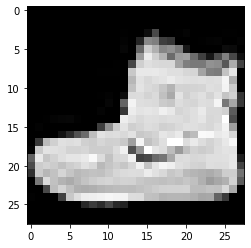

In [11]:
plt.imshow(image.squeeze(), cmap="gray")

查看一批样本

In [12]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=100
)

batch = next(iter(display_loader))

images, labels = batch

print(len(images))

print(images.shape) #NCHW
print(labels.shape)

100
torch.Size([100, 1, 28, 28])
torch.Size([100])


Plot the images

To plot a batch of images, we can use the `torchvision.utils.make_grid()`

In [13]:
grid = torchvision.utils.make_grid(images, nrow=10) # nrow表示each row放几个样本
print(grid.shape)
grid = transforms.ToPILImage()(grid)

torch.Size([3, 302, 302])


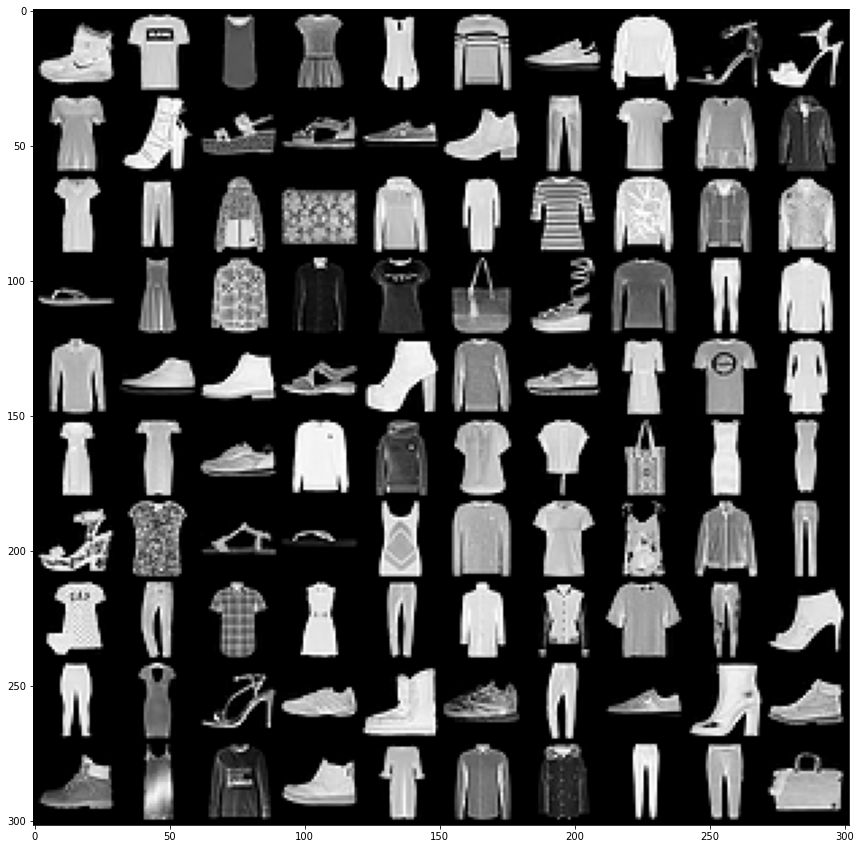

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(grid)

### 10 Build CNN Model

When say *model*, we mean our *network*. The words *model* and *network* mean the same thing.

To build neural networks in PyTorch, we use the `torch.nn` package, which is PyTorch's neural network (nn) library.

We typically import the package like so:

In [1]:
import torch.nn as nn

The primary component we'll need to build a neural network is a ***layer***

#### PyTorch's `nn.Module` Class

Neural networks and layers in PyTorch extend the `nn.Module` class. This means that we must extend the `nn.Module` class when building a new layer or neural network in PyTorch.

#### Building A Neural Network In PyTorch

1. Extend the `nn.Module` base class.
2. Define layers as class attributes.
3. Implement the `forward()` method.

In [2]:
# A simple sample
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.layer1 = None
    def forward(self, x):
        output = self.layer1(x)
        return output

In [7]:
# A simple CNN
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # implement the forward pass
        return t

In [8]:
network = Network()

In [9]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [10]:
network.conv1.weight.shape # 6个卷积核，1通道，卷积核尺寸是5*5

torch.Size([6, 1, 5, 5])

In [11]:
network.conv2.weight.shape # 12个卷积核，6个通道，卷积核尺寸是5*5

torch.Size([12, 6, 5, 5])

In [12]:
network.fc1.weight.shape # 全连接：y=wx+b, Y=XW. X:NxD, W: D*K, Y: NxK. N个样本 每个样本维度为D，K个类别

torch.Size([120, 192])

In [14]:
network.fc2.weight.shape

torch.Size([60, 120])